## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 03 : Regresi dan Induksi Pohon Keputusan </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [20]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Reinhard Javera Maheswara"
myNIM = "77732"
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Reinhard Javera Maheswara
NIM: 		77732
Start: 		2024-09-15 18:40:11.496940
Device ID: 	442db33c-7357-11ef-9a32-9bde147c1379



---

### Dataset yang dipakai:

1. Cost of Living Index by Country – sumber : https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024
2. UCI Heart Disease Data – sumber : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

---

### Hasil kerja

In [21]:
import sys

In [22]:
import numpy as np

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [24]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(1000)
y = 2 * x - 5 + rng.randn(1000)
plt.scatter(x, y);

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [26]:
print("Model slope: \t\t", model.coef_[0])
print("Model intercept: \t", model.intercept_)

Model slope: 		 2.0010633727520264
Model intercept: 	 -4.9580021895763045


In [27]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(1000, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.4999999999999627
[ 1.5 -2.   1. ]


In [28]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [29]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [30]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(1000)
y = np.sin(x) + 0.1 * rng.randn(1000)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

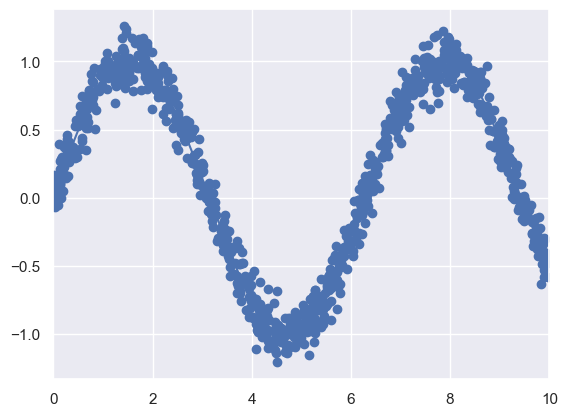

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
        
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

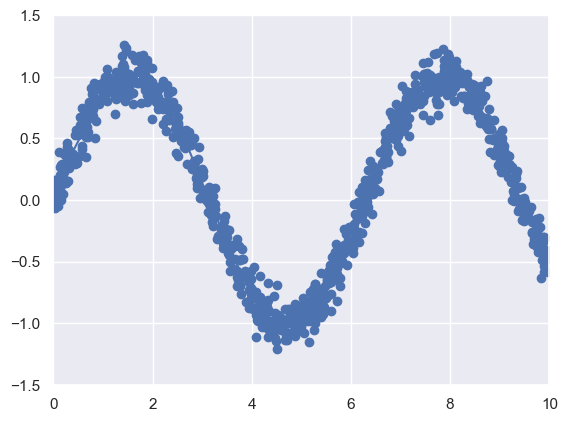

In [32]:
model = make_pipeline(GaussianFeatures(30),
                        LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

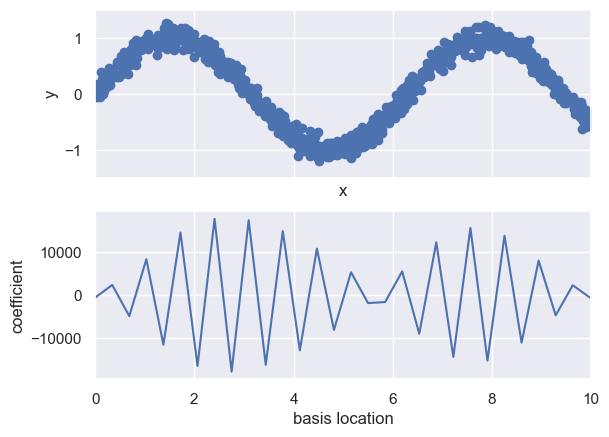

In [33]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

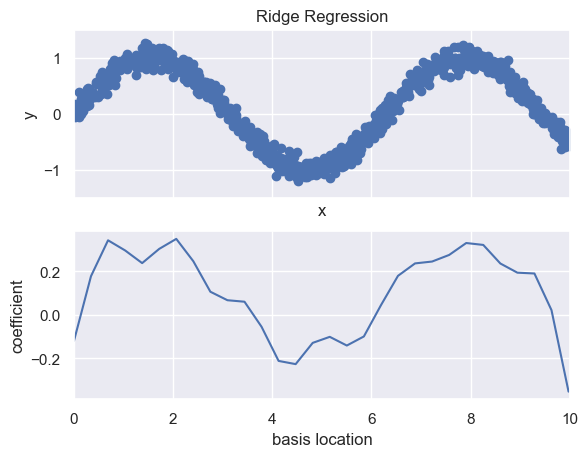

In [34]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

In [35]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

LINEAR REGRESSION

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv("E:/_Kuliah/Semester 5/MachineLearning/Week3/costofliving_2024.csv")
df

Rank      Country  Cost of Living Index  Rent Index  \
0       1  Switzerland                 101.1        46.5   
1       2      Bahamas                  85.0        36.7   
2       3      Iceland                  83.0        39.2   
3       4    Singapore                  76.7        67.2   
4       5     Barbados                  76.6        19.0   
..    ...          ...                   ...         ...   
116   117   Bangladesh                  22.5         2.4   
117   118        India                  21.2         5.6   
118   119        Egypt                  21.0         3.7   
119   120        Libya                  20.4         4.3   
120   121     Pakistan                  18.8         2.8   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                              74.9            109.1                    97.0   
1                              61.8             81.6                    83.3   
2                              62.0             88.4                    86.8   
3                              72.1             74.6                    50.4   
4                              48.9             80.8                    69.4   
..                              ...              ...                     ...   
116                            12.8             25.7                    12.8   
117                            13.7             23.8                    15.1   
118                            12.7             21.2                    16.2   
119                            12.7             22.2                    15.2   
120                            11.1             17.5                    12.9   

     Local Purchasing Power Index  
0                           158.7  
1                            54.6  
2                           120.3  
3                           111.1  
4                            43.5  
..                            ...  
116                          33.1  
117                          82.6  
118                          20.0  
119                          42.0  
120                          29.1  

[121 rows x 8 columns]

In [38]:
df = df[['Rent Index', 'Groceries Index']]
df

Rent Index  Groceries Index
0          46.5            109.1
1          36.7             81.6
2          39.2             88.4
3          67.2             74.6
4          19.0             80.8
..          ...              ...
116         2.4             25.7
117         5.6             23.8
118         3.7             21.2
119         4.3             22.2
120         2.8             17.5

[121 rows x 2 columns]

In [39]:
df.isnull().sum()

Rent Index         0
Groceries Index    0
dtype: int64

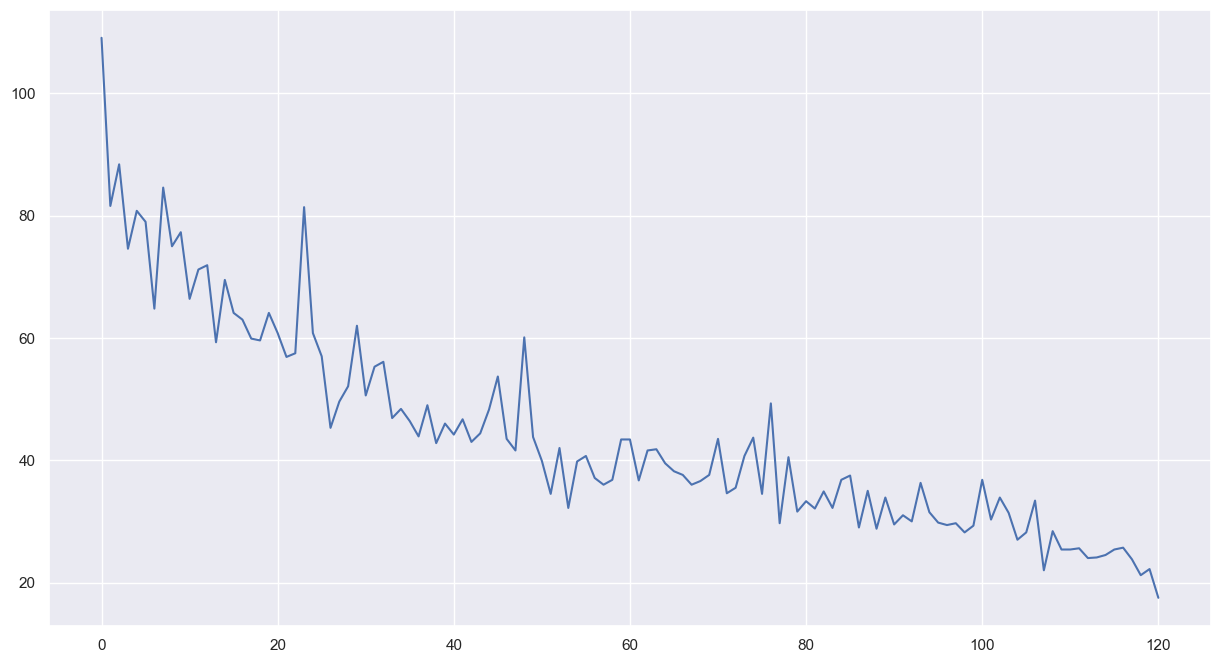

In [40]:
plt.figure(figsize=(15, 8))
plt.plot(df['Groceries Index'])
plt.show()

In [41]:
df['Rent Index'] = df.index

In [42]:
df['Rent Index'] = df[("Rent Index")].values.astype("float64")

In [43]:
column = ["Rent Index", "Groceries Index"]
x = df[column]
y = df["Groceries Index"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [45]:
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

In [46]:
model = LinearRegression(fit_intercept = False)
model.fit(x, y)
df['Prediction'] = model.predict(x)

In [47]:
plt.figure(figsize=(15, 8))
df[['Groceries Index', 'Prediction']].plot(alpha = 0.5)

<Axes: >

<Figure size 1500x800 with 0 Axes>

In [48]:
params = pd.Series(model.coef_, index=x.columns)
params

Rent Index        -3.721637e-16
Groceries Index    1.000000e+00
dtype: float64

In [49]:
print("Model Slope: \t\t", model.coef_[0])
print("Model Intercept: \t", model.intercept_)

Model Slope: 		 -3.7216368292785024e-16
Model Intercept: 	 0.0


In [50]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                    20, 50, 100, 500, 1000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001811      0.000403         0.001057        0.000112      0.0001   
1       0.001450      0.000578         0.001128        0.000195       0.001   
2       0.001804      0.000511         0.001000        0.000002        0.01   
3       0.001102      0.000201         0.001101        0.000199        0.05   
4       0.001843      0.000538         0.000802        0.000401         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -1.227461e-07      -1.300116e-07      -2.848530e-07   
1   {'alpha': 0.001}      -1.227461e-06      -1.300115e-06      -2.848528e-06   
2    {'alpha': 0.01}      -1.227458e-05      -1.300112e-05      -2.848517e-05   
3    {'alpha': 0.05}      -6.137222e-05      -6.500495e-05      -1.424234e-04   
4     {'alpha': 0.1}      -1.227427e-04      -1.300082e-04      -2.848406e-04   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -7.788957e-08  ...    -1.451027e-07    7.212013e-08                1   
1      -7.788954e-07  ...    -1.451027e-06    7.212009e-07                2   
2      -7.788937e-06  ...    -1.451022e-05    7.211975e-06                3   
3      -3.894429e-05  ...    -7.255016e-05    3.605911e-05                4   
4      -7.788759e-05  ...    -1.450979e-04    7.211633e-05                5   

   split0_train_score  split1_train_score  split2_train_score  \
0       -1.260375e-07       -1.175820e-07       -1.743106e-07   
1       -1.260375e-06       -1.175819e-06       -1.743105e-06   
2       -1.260372e-05       -1.175817e-05       -1.743098e-05   
3       -6.301792e-05       -5.879019e-05       -8.715338e-05   
4       -1.260341e-04       -1.175788e-04       -1.743029e-04   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -1.195123e-07       -1.186693e-07     -1.312224e-07     2.174508e-08  
1       -1.195123e-06       -1.186693e-06     -1.312223e-06     2.174506e-07  
2       -1.195120e-05       -1.186690e-05     -1.312219e-05     2.174490e-06  
3       -5.975544e-05       -5.933390e-05     -6.561017e-05     1.087208e-05  
4       -1.195094e-04       -1.186663e-04     -1.312183e-04     2.174326e-05  

[5 rows x 21 columns]

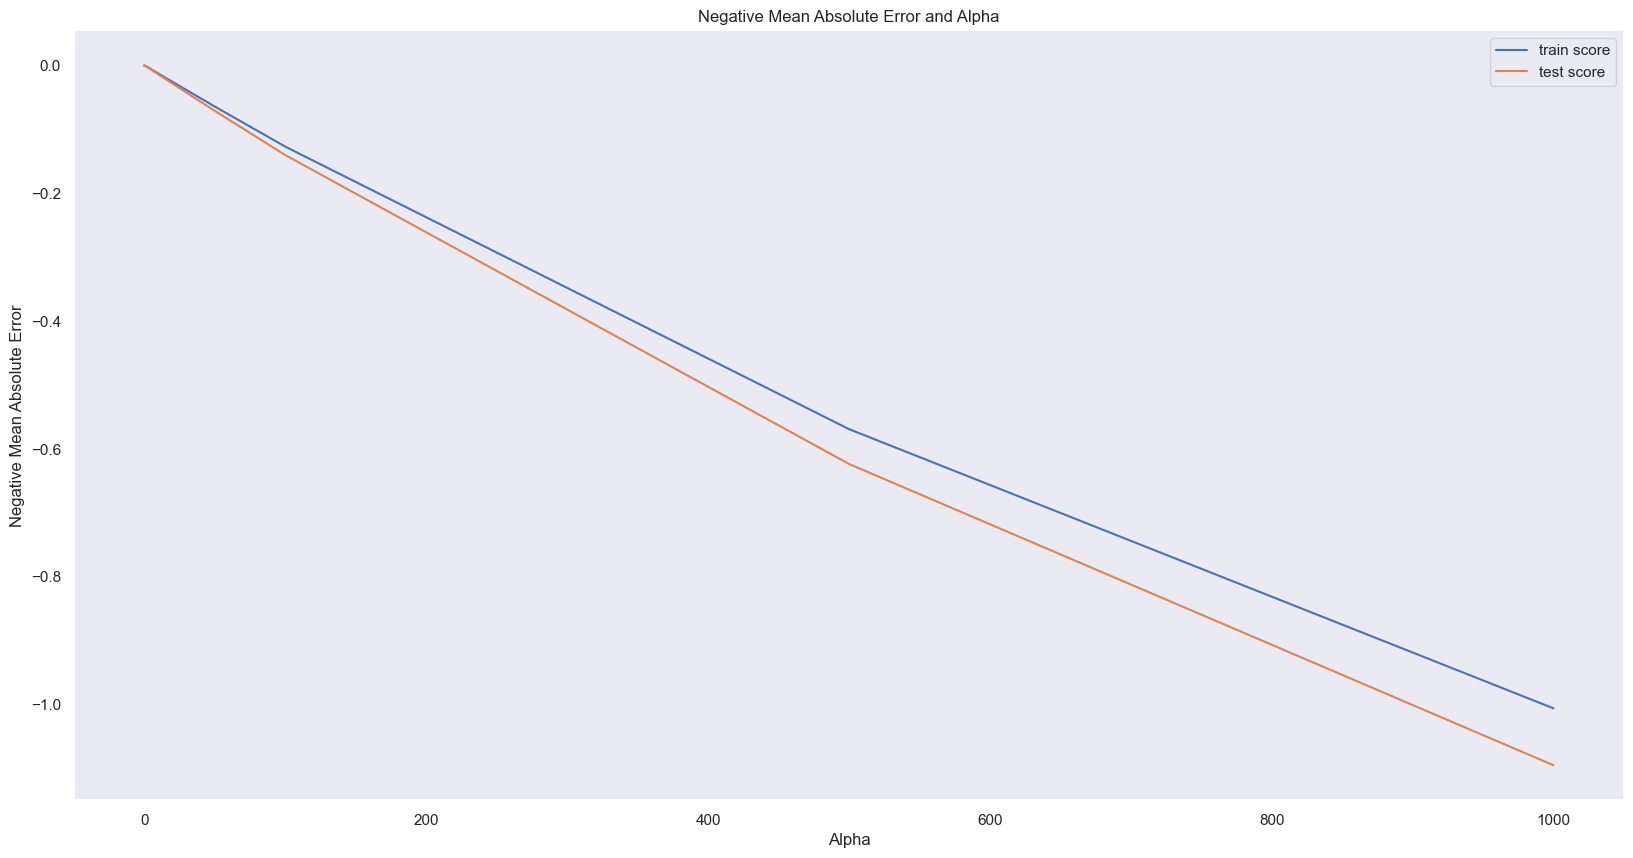

In [52]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

plt.figure(figsize=(20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [53]:
cv_results = cv_results[cv_results['param_alpha']<=200]

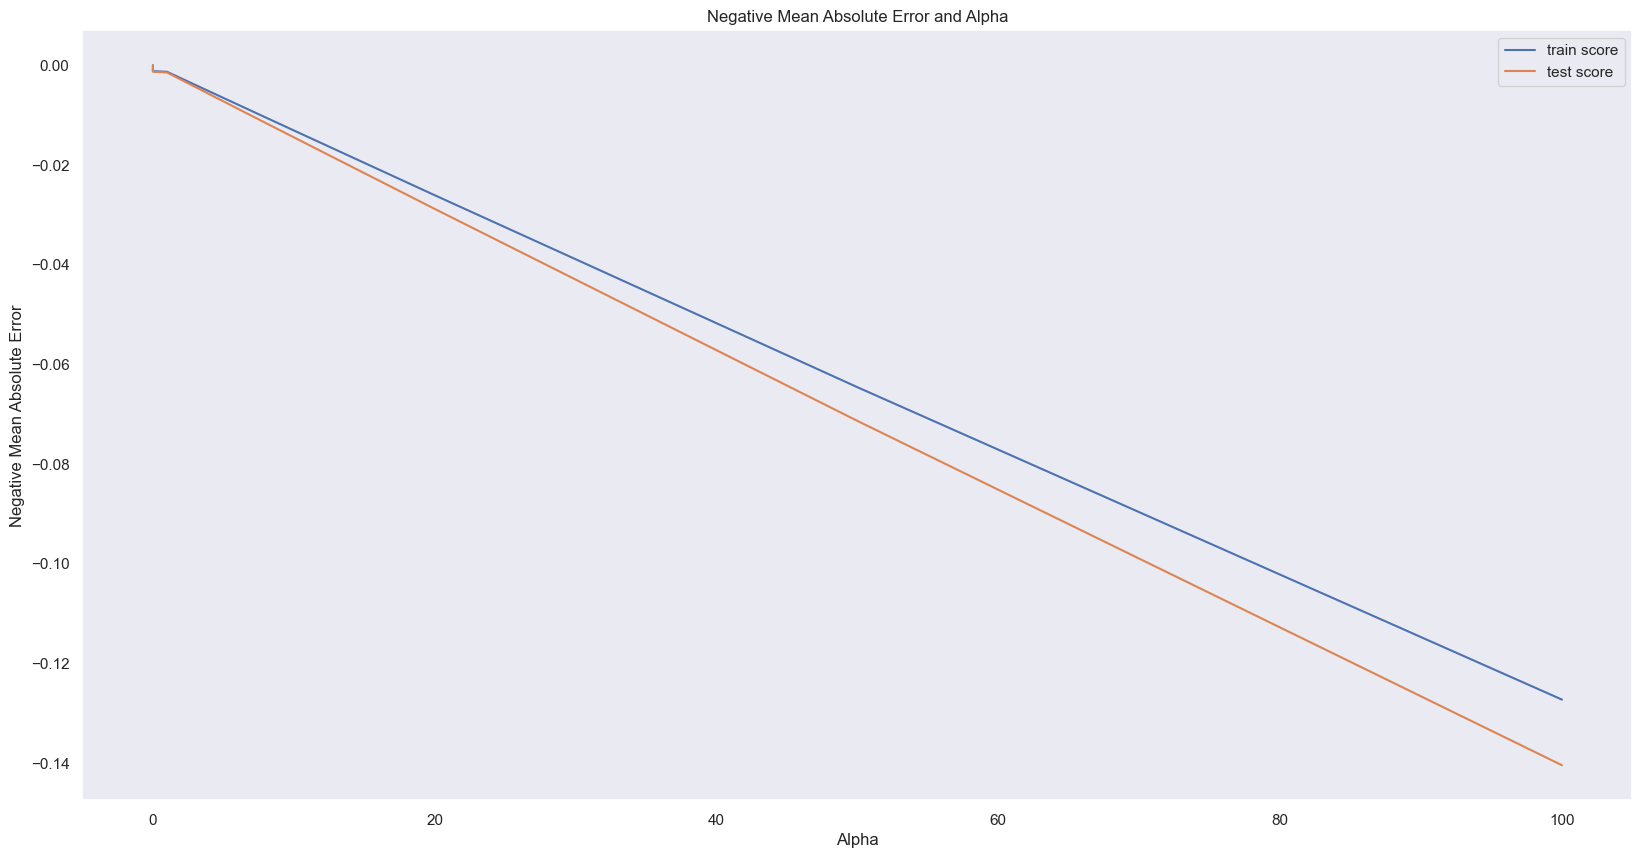

In [54]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

plt.figure(figsize=(20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [55]:
alpha = 15
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train)
ridge.coef_

array([-0.0011736 ,  0.99724864])

In [56]:
imp_ridge = pd.DataFrame({
    "Varname": x.columns,
    "Coefficient": ridge.coef_})
imp_ridge.sort_values(by='Coefficient', ascending=False)

Varname  Coefficient
1  Groceries Index     0.997249
0       Rent Index    -0.001174

In [57]:
y_pred = ridge.predict(x_test)

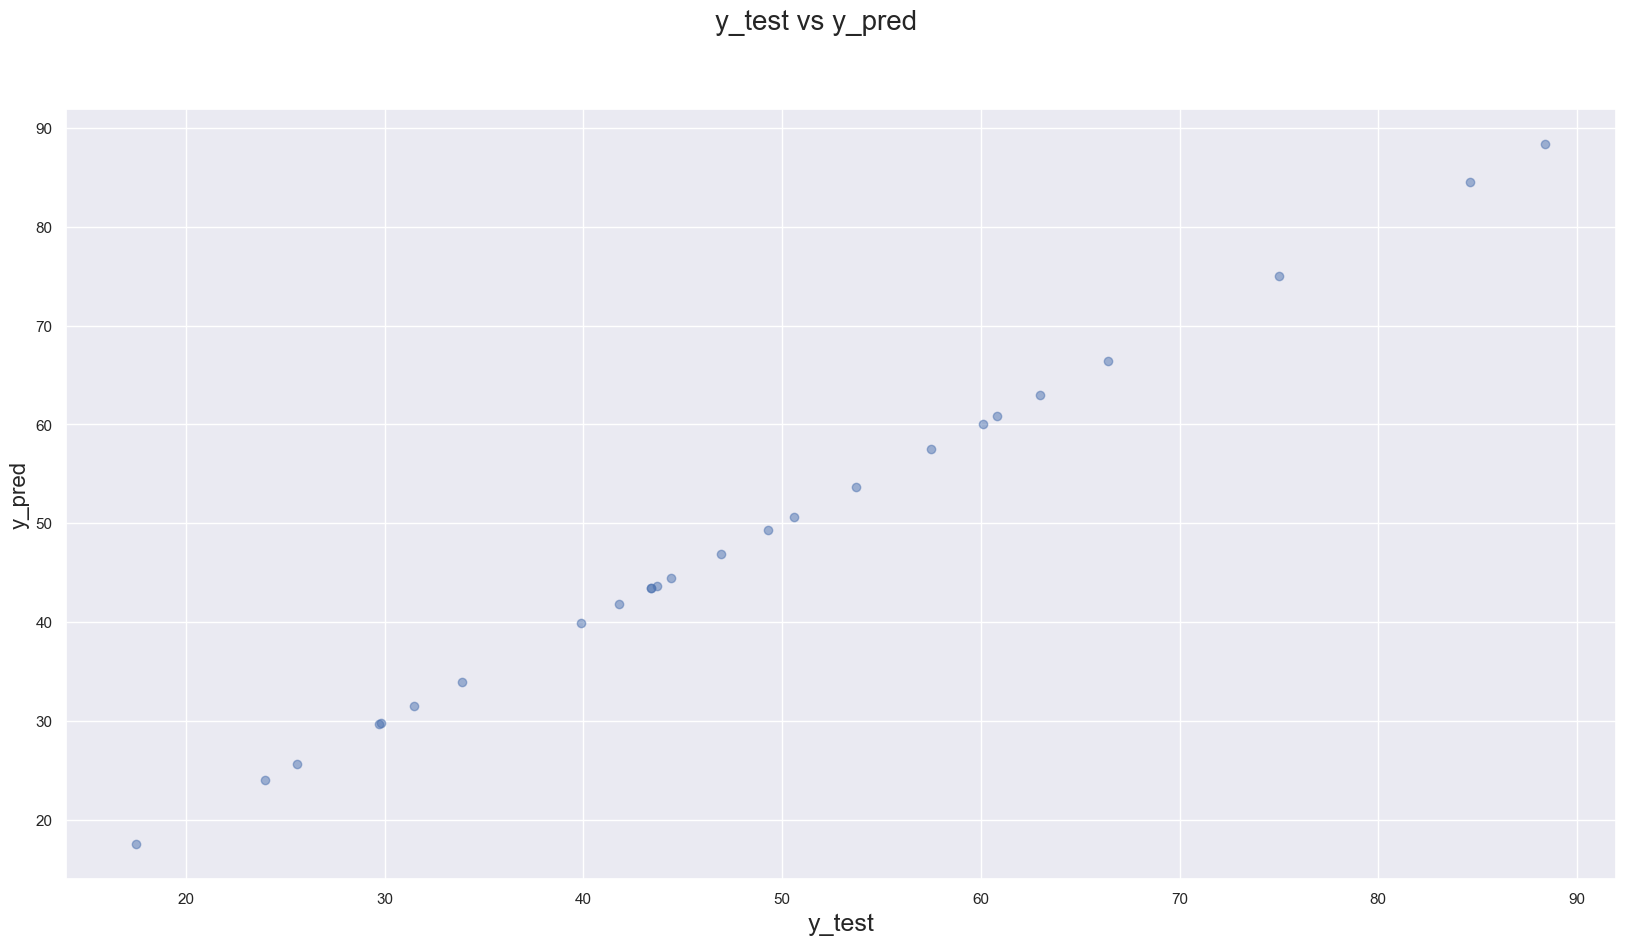

In [58]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(y_test, y_pred, alpha = .5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predictions': y_pred})
df['Predictions'] = round(df['Predictions'], 2)
df

Actual  Predictions
48     60.1        60.07
94     31.5        31.49
95     29.8        29.80
8      75.0        74.97
97     29.7        29.70
22     57.5        57.51
7      84.6        84.55
10     66.4        66.40
45     53.7        53.69
89     33.9        33.89
33     46.9        46.92
50     39.9        39.92
2      88.4        88.35
60     43.4        43.40
120    17.5        17.50
74     43.7        43.68
30     50.6        50.62
43     44.4        44.42
112    24.0        23.99
76     49.3        49.27
63     41.8        41.80
59     43.4        43.40
16     63.0        63.00
24     60.8        60.80
111    25.6        25.59

In [60]:
metrics.explained_variance_score(y_test, y_pred)

0.9999988315097893

In [61]:
metrics.mean_absolute_error(y_test, y_pred)

0.014489526412708642

In [62]:
metrics.max_error(y_test, y_pred)

0.05493453745168608

In [63]:
metrics.mean_squared_error(y_test, y_pred)

0.0004261128569712587

In [64]:
metrics.r2_score(y_test, y_pred)

0.9999986732052282

LASSO REGRESSION

In [65]:
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_iter = [1, 10, 100]
lasso_gscv = GridSearchCV(estimator=Lasso(),
                            param_grid={'alpha': alpha,
                                        'max_iter': max_iter},
                            scoring='neg_mean_absolute_error',
                            cv=5,
                            refit=False)

In [66]:
lasso_gscv.fit(x, y)
lasso_gscv.best_params_

{'alpha': 0.0001, 'max_iter': 100}

In [67]:
lasso = Lasso(alpha = lasso_gscv.best_params_['alpha'],
                max_iter = lasso_gscv.best_params_['max_iter'])
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=100)

In [68]:
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))

Training set score: 1.00
Test set score: 1.00


MULTIPLE LINEAR REGRESSION

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [70]:
print(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]


In [71]:
print(y)

[ 4  5 20 14 32 22 38 43]


In [72]:
model = LinearRegression().fit(x, y)

In [73]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756776
intercept: 5.522579275198183
slope: [0.44706965 0.25502548]


In [74]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [75]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [76]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [77]:
y_new = model.predict(x_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


ADVANCED LINEAR REGRESSION WITH STATSMODELS

In [78]:
import numpy as np
import statsmodels.api as sm

In [79]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [80]:
x = sm.add_constant(x)

In [81]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [82]:
model = sm.OLS(y, x)
results = model.fit()

In [83]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Sun, 15 Sep 2024   Prob (F-statistic):            0.00713
Time:                        18:40:16   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

In [84]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.8615939258756776
adjusted coefficient of determination: 0.8062314962259487
regression coefficients: [5.52257928 0.44706965 0.25502548]


In [85]:
print('predicted response:', results.fittedvalues, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [86]:
print('predicted response:', results.predict(x), sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [87]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]


In [88]:
y_new = results.predict(x_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


LOGISTIC REGRESSION

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [90]:
data = pd.read_csv("E:/_Kuliah/Semester 5/MachineLearning/Week3/heart_disease_uci.csv", header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(299, 16)
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [91]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [92]:
data.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [93]:
data['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [94]:
# data['cp'] = np.where(data['cp'] == 'atypical angina', 'angina', data['cp'])
# data['cp'] = np.where(data['cp'] == 'typical angina', 'angina', data['cp'])

In [95]:
data['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [96]:
data.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

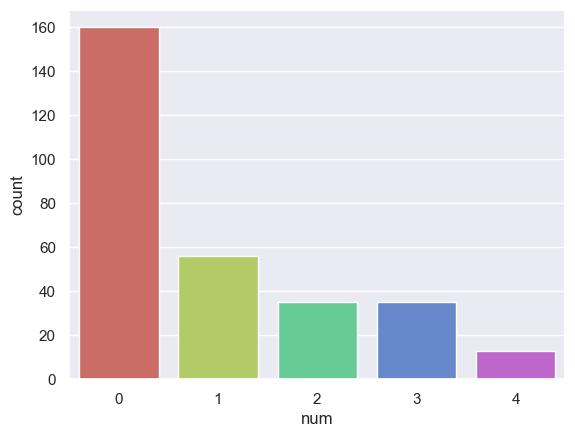

<Figure size 640x480 with 0 Axes>

In [97]:
sns.countplot(x='num', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [98]:
# make the percenteges of target variables when 0 = no heart disease and 1,2,3,4 = stages of heart disease
countNoDisease = len(data[data['num']==0])
countStageOne = len(data[data['num']==1])
countStageTwo = len(data[data['num']==2])
countStageThree = len(data[data['num']==3])
countStageFour = len(data[data['num']==4])

percentNoDisease = countNoDisease/(countNoDisease+countStageOne+countStageTwo+countStageThree+countStageFour)
percentStageOne = countStageOne/(countNoDisease+countStageOne+countStageTwo+countStageThree+countStageFour)
percentStageTwo = countStageTwo/(countNoDisease+countStageOne+countStageTwo+countStageThree+countStageFour)
percentStageThree = countStageThree/(countNoDisease+countStageOne+countStageTwo+countStageThree+countStageFour)
percentStageFour = countStageFour/(countNoDisease+countStageOne+countStageTwo+countStageThree+countStageFour)

print("percentage of no heart disease", percentNoDisease * 100)
print("percentage of heart disease stage one", percentStageOne * 100)
print("percentage of heart disease stage two", percentStageTwo * 100)
print("percentage of heart disease stage three", percentStageThree * 100)
print("percentage of heart disease stage four", percentStageFour * 100)

percentage of no heart disease 53.51170568561873
percentage of heart disease stage one 18.729096989966553
percentage of heart disease stage two 11.705685618729097
percentage of heart disease stage three 11.705685618729097
percentage of heart disease stage four 4.3478260869565215


In [99]:
data.groupby('num').mean(numeric_only=True)

id        age    trestbps        chol      thalch   oldpeak  \
num                                                                        
0    146.487500  52.643750  129.175000  243.493750  158.581250  0.598750   
1    169.214286  55.464286  133.339286  246.071429  144.660714  1.039286   
2    169.371429  58.200000  134.371429  260.857143  135.000000  1.802857   
3    152.742857  56.000000  135.457143  246.457143  132.057143  1.962857   
4    140.000000  59.692308  138.769231  253.384615  140.615385  2.361538   

           ca  
num            
0    0.275000  
1    0.714286  
2    1.257143  
3    1.457143  
4    1.692308

In [100]:
data.groupby('sex').mean(numeric_only=True)

id        age    trestbps        chol      thalch   oldpeak  \
sex                                                                           
Female  161.791667  55.750000  133.395833  262.229167  151.604167  0.876042   
Male    150.128079  53.940887  130.921182  239.482759  148.251232  1.144828   

              ca       num  
sex                         
Female  0.552083  0.541667  
Male    0.729064  1.137931

In [101]:
data.groupby('dataset').mean(numeric_only=True)

id        age    trestbps        chol      thalch  \
dataset                                                                    
Cleveland      150.673401  54.542088  131.693603  247.350168  149.599327   
Hungary        509.000000  47.000000  150.000000  226.000000   98.000000   
VA Long Beach  749.000000  56.000000  120.000000  100.000000  120.000000   

                oldpeak        ca       num  
dataset                                      
Cleveland      1.055556  0.676768  0.946128  
Hungary        1.500000  0.000000  1.000000  
VA Long Beach  1.500000  0.000000  1.000000

In [102]:
data.groupby('cp').mean(numeric_only=True)

id        age    trestbps        chol      thalch  \
cp                                                                           
asymptomatic     161.437500  55.777778  132.270833  249.645833  140.118056   
atypical angina  163.204082  51.224490  128.469388  245.285714  162.795918   
non-anginal      137.072289  53.915663  130.132530  245.385542  155.518072   
typical angina   147.260870  55.869565  140.869565  237.130435  155.956522   

                  oldpeak        ca       num  
cp                                             
asymptomatic     1.386806  0.930556  1.562500  
atypical angina  0.314286  0.346939  0.285714  
non-anginal      0.836145  0.469880  0.397590  
typical angina   1.391304  0.478261  0.478261

In [103]:
data.groupby('fbs').mean(numeric_only=True)

id       age    trestbps        chol      thalch   oldpeak  \
fbs                                                                        
False  156.25000  54.03125  130.410156  246.421875  149.355469  1.055078   
True   139.72093  57.44186  139.488372  248.953488  149.162791  1.079070   

             ca       num  
fbs                        
False  0.613281  0.921875  
True   1.023256  1.093023

In [104]:
data.groupby('restecg').mean(numeric_only=True)

id        age    trestbps        chol      thalch  \
restecg                                                                       
lv hypertrophy    137.068493  55.821918  134.246575  255.808219  148.253425   
normal            167.362416  53.073826  129.000000  237.543624  151.013423   
st-t abnormality  264.750000  61.000000  140.500000  261.750000  125.750000   

                   oldpeak        ca       num  
restecg                                         
lv hypertrophy    1.166438  0.794521  1.157534  
normal            0.908054  0.543624  0.704698  
st-t abnormality  2.725000  1.000000  2.250000

In [105]:
data.groupby('exang').mean(numeric_only=True)

id        age    trestbps        chol      thalch   oldpeak  \
exang                                                                        
False  150.835000  53.935000  130.870000  245.205000  155.730000  0.821000   
True   160.010101  55.707071  133.424242  249.979798  136.393939  1.538384   

             ca       num  
exang                      
False  0.580000  0.610000  
True   0.858586  1.626263

In [106]:
data.groupby('slope').mean(numeric_only=True)

id        age    trestbps        chol      thalch  \
slope                                                                    
downsloping  115.190476  55.380952  139.476190  237.666667  144.904762   
flat         164.546763  56.143885  132.223022  248.431655  138.676259   
upsloping    149.043165  52.769784  130.035971  246.517986  160.647482   

              oldpeak        ca       num  
slope                                      
downsloping  2.714286  0.571429  1.476190  
flat         1.449640  0.834532  1.395683  
upsloping    0.417266  0.525180  0.417266

In [107]:
data.groupby('thal').mean(numeric_only=True)

id        age    trestbps        chol      thalch  \
thal                                                                           
fixed defect       173.722222  56.666667  136.944444  227.000000  135.111111   
normal             152.987805  53.481707  129.402439  247.414634  155.512195   
reversable defect  152.059829  55.649573  134.153846  248.948718  142.846154   

                    oldpeak        ca       num  
thal                                             
fixed defect       1.522222  1.000000  1.444444  
normal             0.690854  0.457317  0.378049  
reversable defect  1.502564  0.923077  1.666667

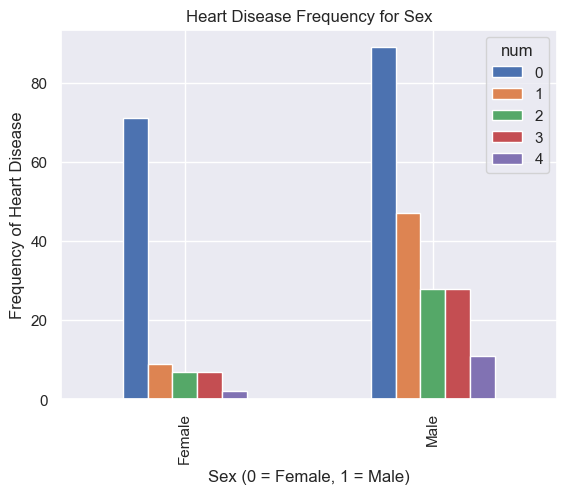

In [108]:
# %matplotlib.inline
pd.crosstab(data.sex, data.num).plot(kind='bar')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency of Heart Disease')
plt.savefig('heart_disease_sex')

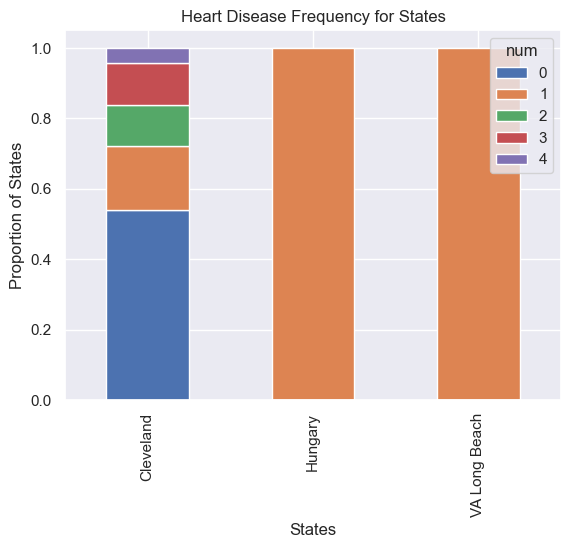

In [109]:
table=pd.crosstab(data.dataset, data.num)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Heart Disease Frequency for States')
plt.xlabel('States')
plt.ylabel('Proportion of States')
plt.savefig('states_v_heart_disease')

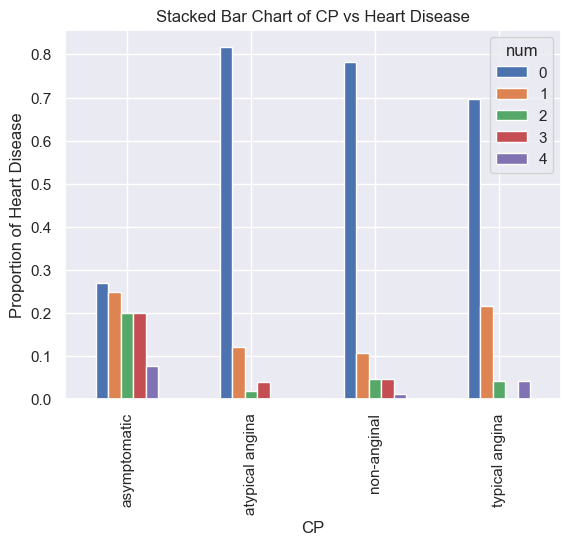

In [110]:
table = pd.crosstab(data.cp, data.num)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of CP vs Heart Disease')
plt.xlabel('CP')
plt.ylabel('Proportion of Heart Disease')
plt.savefig('cp_vs_heart_disease_stack')

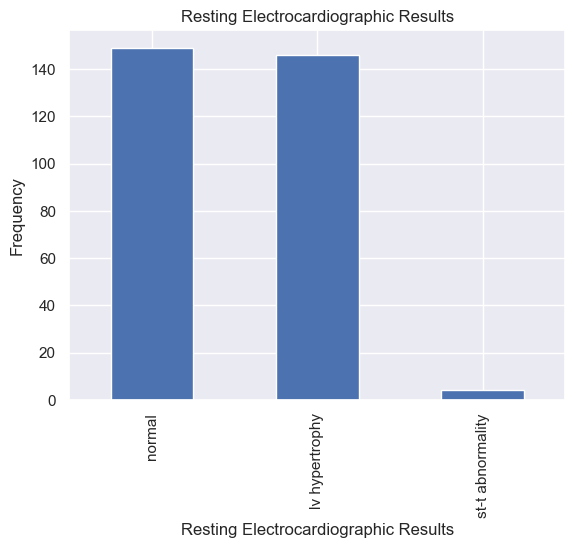

In [111]:
data['restecg'].value_counts().plot(kind='bar')
plt.title('Resting Electrocardiographic Results')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.savefig('restecg_bar_chart')

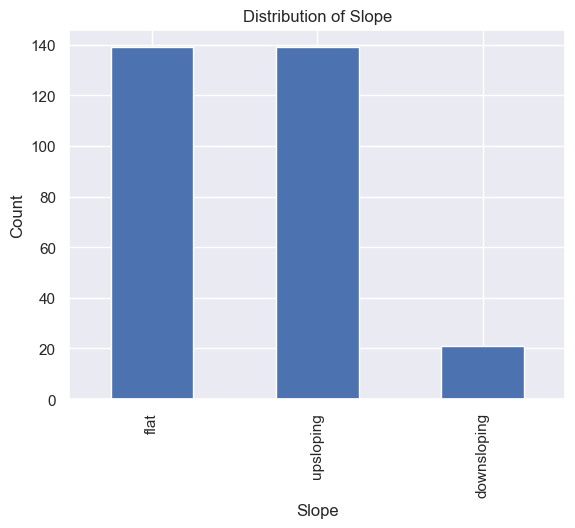

In [112]:
data['slope'].value_counts().plot(kind='bar')
plt.title('Distribution of Slope')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.savefig('slope_bar_chart')

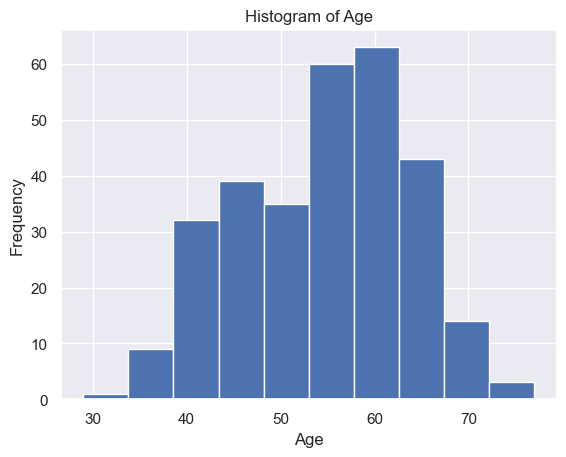

In [113]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

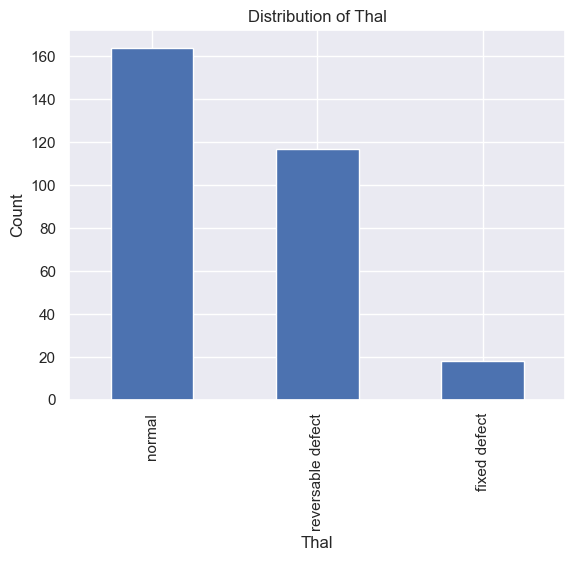

In [114]:
data['thal'].value_counts().plot(kind='bar')
plt.title('Distribution of Thal')
plt.xlabel('Thal')
plt.ylabel('Count')
plt.savefig('thal_bar_chart')

In [115]:
cat_vars = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1
cat_vars = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [116]:
data_final = data[to_keep]
data_final.columns.values

array(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_VA Long Beach', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'fbs_False', 'fbs_True',
       'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype=object)

In [117]:
X = data_final.loc[:, data_final.columns != 'num']
y = data_final.loc[:, data_final.columns == 'num']

In [118]:
np.asarray(data)

array([[1, 63, 'Male', ..., True, False, False],
       [2, 67, 'Male', ..., False, True, False],
       [3, 67, 'Male', ..., False, False, True],
       ...,
       [302, 57, 'Female', ..., False, True, False],
       [509, 47, 'Male', ..., False, False, True],
       [749, 56, 'Male', ..., False, False, True]], dtype=object)

In [119]:
import statsmodels.api as sm
X = X.astype(float)
y = y.astype(float)
logit_model = sm.MNLogit(y, X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.761137
         Iterations: 35
                                     Results: MNLogit
Model:                        MNLogit                  Method:                   MLE       
Dependent Variable:           num                      Pseudo R-squared:         0.409     
Date:                         2024-09-15 18:40         AIC:                      631.1599  
No. Observations:             299                      BIC:                      956.7990  
Df Model:                     84                       Log-Likelihood:           -227.58   
Df Residuals:                 211                      LL-Null:                  -384.77   
Converged:                    0.0000                   LLR p-value:              2.4738e-28
No. Iterations:               35.0000                  Scale:                    1.0000    
-------------------------------------------------------------------------------------------
         num = 0           Coef.     Std.Err.      t

e:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [121]:
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.59


In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[45  0  1  0  0]
 [13  2  2  1  0]
 [ 7  0  3  1  0]
 [ 2  2  4  3  0]
 [ 2  0  1  1  0]]


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.98      0.78        46
         1.0       0.50      0.11      0.18        18
         2.0       0.27      0.27      0.27        11
         3.0       0.50      0.27      0.35        11
         4.0       0.00      0.00      0.00         4

    accuracy                           0.59        90
   macro avg       0.38      0.33      0.32        90
weighted avg       0.53      0.59      0.51        90



---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset.
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

    1. Simpulan perbandingan dataset
    Cost of Living Index by Country dataset, indeks ini menunjukkan harga relatif barang-barang konsumsi seperti bahan makanan, restoran, transportasi, dan utilitas. Indeks ini tidak mencakup biaya akomodasi seperti sewa atau hipotek. Sebagai contoh, sebuah kota dengan Indeks Biaya Hidup sebesar 120 diperkirakan 20% lebih mahal daripada New York City (tidak termasuk sewa). Sedangkan, UCI Heart Disease Data, Ini adalah jenis dataset multivariat, yang berarti menyediakan atau melibatkan berbagai variabel matematika atau statistik yang terpisah, analisis data numerik multivariat. Dataset ini terdiri dari 14 atribut yaitu usia, jenis kelamin, jenis nyeri dada, tekanan darah istirahat, kolesterol serum, gula darah puasa, hasil elektrokardiografi saat istirahat, detak jantung maksimum yang dicapai, angina yang diinduksi oleh latihan, oldpeak — depresi ST yang diinduksi oleh latihan relatif terhadap istirahat, kemiringan segmen ST saat latihan puncak, jumlah pembuluh darah utama, dan talasemia. Basis data ini sebenarnya mencakup 76 atribut, tetapi semua studi yang diterbitkan hanya menggunakan subset dari 14 atribut tersebut. Basis data Cleveland adalah satu-satunya yang digunakan oleh peneliti pembelajaran mesin (ML) hingga saat ini. Salah satu tugas utama dari dataset ini adalah memprediksi, berdasarkan atribut yang diberikan dari seorang pasien, apakah orang tersebut menderita penyakit jantung atau tidak. Selain itu, ada juga tugas eksperimental untuk mendiagnosis dan menemukan berbagai wawasan dari dataset ini yang dapat membantu dalam memahami masalah lebih lanjut.

    2. Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa
    Regresi merupakan metode yang berguna untuk memprediksi nilai kontinu dari variabel target berdasarkan variabel input. Teknik ini bekerja dengan membentuk hubungan matematis antara variabel-variabel tersebut, dan cocok digunakan ketika terdapat hubungan linear atau non-linear yang dapat dijelaskan secara matematis. Kinerja regresi sangat dipengaruhi oleh hubungan antara variabel independen dan target, serta sensitivitasnya terhadap outliers atau data yang ekstrem. Regresi juga lebih efektif jika dataset memiliki sejumlah besar fitur numerik yang berkorelasi dengan target. Induksi Pohon Keputusan, di sisi lain, adalah teknik yang bersifat non-parametrik dan cocok untuk prediksi klasifikasi maupun regresi. Pohon keputusan memiliki kemampuan untuk menangani data kategorikal dan numerik, serta dapat menangani dataset dengan pola hubungan yang kompleks dan interaksi antar fitur. Salah satu keunggulan utamanya adalah interpretabilitas yang tinggi, di mana setiap keputusan atau prediksi dapat dilacak melalui struktur pohon yang jelas. Namun, pohon keputusan dapat rentan terhadap overfitting, terutama pada dataset kecil, sehingga sering kali diperlukan teknik seperti pruning atau ensemble methods seperti Random Forest untuk meningkatkan kinerja.

---

In [124]:
# Footer
import datetime
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Reinhard Javera Maheswara
NIM: 		77732
Time-stamp:	2024-09-15 18:40:19.031015


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [125]:
!jupyter nbconvert --to html "./IF540L_H_laporan_M03_00000077732_Reinhard Javera Maheswara.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_H_laporan_M03_00000077732_Reinhard Javera Maheswara.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 21 image(s).
[NbConvertApp] Writing 1450435 bytes to IF540L_H_laporan_M03_00000077732_Reinhard Javera Maheswara.html
